# Machine Learning (Supervised) - Linear Regression

In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet, Lars, LassoLars,
                                  OrthogonalMatchingPursuit, BayesianRidge, ARDRegression,
                                  HuberRegressor, RANSACRegressor, TheilSenRegressor)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Importing the dataset
data_frame = pd.read_csv("C:\\Users\\david\\OneDrive\\Documents\\GitHub\\Projects\\StatisticalAnalysis\\Billionaires Statistics Dataset.csv")
data_frame.head()

# Filtering the dataset
data_frame = data_frame[['finalWorth', 'category', 'age', 'country', 'industries']]


Preprocessing Data for Machine Learning Options
1) Remove rows with missing values
2) Impute missing values with mean or other statistical method. Analyze significance of imputation.
3) Predictive Imputation - Use a model to predict missing values
4) Using a model that supports missing values
   1) Linear Regression requires no missing values

In [17]:
# Data Preprocessing
# Convert categorical variables using one-hot encoding
data_frame = pd.get_dummies(data_frame, columns=['category', 'country', 'industries'])

# Feature Scaling
scaler = StandardScaler()
data_frame[['age', 'finalWorth']] = scaler.fit_transform(data_frame[['age', 'finalWorth']])

data_frame.head()


,finalWorth,age,category_Automotive,category_Construction & Engineering,category_Diversified,category_Energy,category_Fashion & Retail,category_Finance & Investments,category_Food & Beverage,category_Gambling & Casinos,...,industries_Healthcare,industries_Logistics,industries_Manufacturing,industries_Media & Entertainment,industries_Metals & Mining,industries_Real Estate,industries_Service,industries_Sports,industries_Technology,industries_Telecom
0,20.989450,0.668386,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,17.836602,-1.066740,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11.124085,-0.463218,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,10.412152,0.970147,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,10.310447,2.026311,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Feature Selection and Train-Test Split

# Selecting the target variable and the features
X = data_frame.drop('finalWorth', axis=1)  # Features/INdependent variables
y = data_frame['finalWorth']  # Target variable/dependent variables

# Use mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')



In [22]:
# List of models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    Lars(),
    LassoLars(),
    OrthogonalMatchingPursuit(),
    BayesianRidge(),
    ARDRegression(),
    HuberRegressor(),
    RANSACRegressor(),
    TheilSenRegressor(),
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
]

# Train and evaluate all models
for model in models:
    train_and_evaluate(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 1.8829143152094737e+20
R-squared: -8.016449799513389e+20


Model: Ridge
Mean Squared Error: 0.25080148895682375
R-squared: -0.06777962737083842


Model: Lasso
Mean Squared Error: 0.24319825437313122
R-squared: -0.03540908992165326


Model: ElasticNet
Mean Squared Error: 0.24319825437313122
R-squared: -0.03540908992165326


Model: Lars
Mean Squared Error: 0.7710860865447838
R-squared: -2.282875303437172


Model: LassoLars
Mean Squared Error: 0.24319825437313122
R-squared: -0.03540908992165326


Model: OrthogonalMatchingPursuit
Mean Squared Error: 0.25453845946455145
R-squared: -0.08368966439986192


Model: BayesianRidge
Mean Squared Error: 0.23721147279456867
R-squared: -0.00992055143770254




c:\Users\david\anaconda3\envs\PythonConda\Lib\site-packages\sklearn\linear_model\_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=7.733e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\Users\david\anaconda3\envs\PythonConda\Lib\site-packages\sklearn\linear_model\_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=7.477e-03, with an active set of 10 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\Users\david\anaconda3\envs\PythonConda\Lib\site-packages\sklearn\linear_model\_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=7.167e-03, with an active set 

Model: ARDRegression
Mean Squared Error: 0.2510698667201444
R-squared: -0.06892223744586268




c:\Users\david\anaconda3\envs\PythonConda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: HuberRegressor
Mean Squared Error: 0.243396839605948
R-squared: -0.036254560444098693


Model: RANSACRegressor
Mean Squared Error: 6.845507249361999e+18
R-squared: -2.914453662253369e+19


Model: TheilSenRegressor
Mean Squared Error: 0.23643984838267507
R-squared: -0.006635384230645691


Model: Pipeline
Mean Squared Error: 7.262070492827571e+24
R-squared: -3.091804182273858e+25




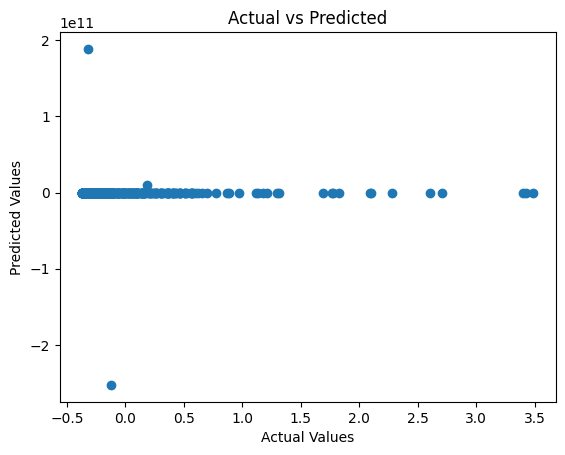

In [20]:
# Visualizing the results for a specific model (e.g., OLS)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()